In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/My Drive/klasifikasi_songket

/content/gdrive/My Drive/klasifikasi_songket


In [3]:
! ls

dataset_songket


Split Dataset

In [4]:
from PIL import Image
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [5]:
main_folder_path = '/content/gdrive/My Drive/klasifikasi_songket/dataset_songket/'

In [6]:
data = []
labels = []

In [7]:
# Membaca setiap folder (mewakili setiap jenis songket)
for label in os.listdir(main_folder_path):
    label_folder_path = os.path.join(main_folder_path, label)

    # Membaca setiap file dalam folder (mewakili setiap gambar songket)
    for file in os.listdir(label_folder_path):
        file_path = os.path.join(label_folder_path, file)

        # Menggunakan try-except untuk menangani file non-gambar
        try:
            # Membaca gambar dan mengonversi menjadi array numpy
            img = Image.open(file_path)
            img_array = np.array(img)

            # Menyimpan data gambar dan label
            data.append(img_array)
            labels.append(label)
        except Exception as e:
            print(f"File {file_path} tidak dapat dibaca sebagai gambar. Error: {e}")

In [8]:
# Mengonversi list ke dalam array numpy
X = np.array(data)
y = np.array(labels)

In [9]:
# Menampilkan beberapa informasi
print("Jumlah data:", len(data))
print("Jumlah labels:", len(labels))

Jumlah data: 534
Jumlah labels: 534


In [10]:
# Memisahkan dataset menjadi set pelatihan, validasi, dan pengujian
validation_split = 0.15
test_split = 0.15

# Memisahkan dataset
X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=(validation_split + test_split), random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=(test_split / (validation_split + test_split)), random_state=42)

In [11]:
print("Jumlah data latihan:", len(X_train))
print("Jumlah data validasi:", len(X_val))
print("Jumlah data pengujian:", len(X_test))

Jumlah data latihan: 373
Jumlah data validasi: 80
Jumlah data pengujian: 81


Read Dataset

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Ukuran gambar:{img.shape}")
  return img

Ukuran gambar:(224, 224, 3)


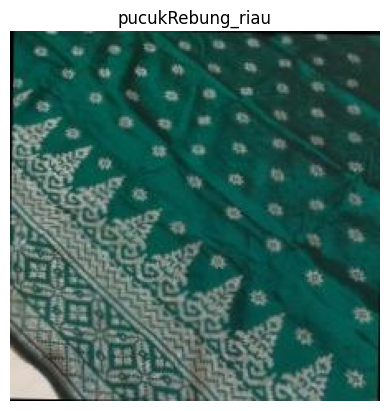

In [13]:
img = view_random_image("dataset_songket/", "pucukRebung_riau")

Membagi ke Tiga Direktori

In [14]:
from shutil import copyfile

base_dir = '/content/gdrive/My Drive/klasifikasi_songket/dataset_split/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Fungsi untuk memindahkan gambar ke dalam direktori yang sesuai
def move_images(images, labels, destination_folder):
    for img, label in zip(images, labels):
        label_folder = os.path.join(destination_folder, label)
        os.makedirs(label_folder, exist_ok=True)

        img_path = os.path.join(label_folder, f"{label}_{len(os.listdir(label_folder)) + 1}.jpg")
        Image.fromarray(img).save(img_path)

# Memindahkan gambar-gambar ke dalam direktori yang sesuai
move_images(X_train, y_train, train_dir)
move_images(X_val, y_val, validation_dir)
move_images(X_test, y_test, test_dir)